<a href="https://colab.research.google.com/github/mratanusarkar/twitter-sentiment-analysis/blob/feature%2Ftweet-analysis-and-inference/Tweet_Analysis_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tweet Analysis and Inference

## Install Packages

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import string
import traceback
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

## Define Helper Functions

In [3]:
def get_tweets(query: str, limit: int) -> pd.DataFrame:
    """
    Scrape tweets from twitter based on input search query
    Arguments:
        :param query: twitter search query as per https://twitter.com/search?q=
        :param limit: number of tweets you want to scrape
    Returns:
        :return: a pandas dataframe with the tweets
    """
    tweets = []
    columns = [
        'id',
        'date',
        'username',
        'content',
        'view_count',
        'like_count',
        'reply_count',
        'retweet_count',
        'quote_Count',
        'url'
    ]
    try:
        print("scraping tweets ...")
        twitter_search = sntwitter.TwitterSearchScraper(query).get_items()
        for tweet in tqdm(twitter_search, total=limit):
            if len(tweets) == limit:
                break
            else:
                data = [
                    tweet.id,
                    tweet.date,
                    tweet.user.username,
                    tweet.rawContent,
                    tweet.viewCount,
                    tweet.likeCount,
                    tweet.replyCount,
                    tweet.retweetCount,
                    tweet.quoteCount,
                    tweet.url
                ]
                tweets.append(data)
        df = pd.DataFrame(tweets, columns=columns)
        return df
    except Exception:
        print(traceback.print_exc())
        return pd.DataFrame()

In [4]:
def refine_text(tweet: str) -> str:
    tweet_words = []
    for word in tweet.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = ""
        elif word.startswith('http') or word.startswith('www'):
            word = ""
        tweet_words.append(word)
    
    refined_tweet = " ".join(tweet_words)
    
    exclude = set(string.punctuation)
    refined_tweet = ''.join(ch for ch in refined_tweet if ch not in exclude)
    
    return refined_tweet

In [5]:
def word_counter(tweet: str, counter: Counter) -> Counter:
    word_list = tweet.split(' ')
    word_count = Counter(word_list)
    return counter + word_count

In [6]:
def remove_common_words(counter: Counter) -> Counter:
    # https://www.textfixer.com/tutorials/common-english-words.php
    common_words = [
        "", "'tis", "'twas", "a", "able", "about", "across", "after", "ain't", 
        "all", "almost", "also", "am", "among", "an", "and", "any", "are", "aren't", 
        "as", "at", "be", "because", "been", "but", "by", "can", "can't", "cannot", 
        "could", "could've", "couldn't", "dear", "did", "didn't", "do", "does", 
        "doesn't", "don't", "either", "else", "ever", "every", "for", "from", "get", 
        "got", "had", "has", "hasn't", "have", "he", "he'd", "he'll", "he's", "her", 
        "hers", "him", "his", "how", "how'd", "how'll", "how's", "however", "i", 
        "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", 
        "its", "just", "least", "let", "like", "likely", "may", "me", "might", "might've", 
        "mightn't", "most", "must", "must've", "mustn't", "my", "neither", "no", "nor", 
        "not", "of", "off", "often", "on", "only", "or", "other", "our", "own", "rather", 
        "said", "say", "says", "shan't", "she", "she'd", "she'll", "she's", "should", 
        "should've", "shouldn't", "since", "so", "some", "than", "that", "that'll", 
        "that's", "the", "their", "them", "then", "there", "there's", "these", "they", 
        "they'd", "they'll", "they're", "they've", "this", "tis", "to", "too", "twas", 
        "us", "wants", "was", "wasn't", "we", "we'd", "we'll", "we're", "were", "weren't", 
        "what", "what'd", "what's", "when", "when", "when'd", "when'll", "when's", "where", 
        "where'd", "where'll", "where's", "which", "while", "who", "who'd", "who'll", 
        "who's", "whom", "why", "why'd", "why'll", "why's", "will", "with", "won't", 
        "would", "would've", "wouldn't", "yet", "you", "you'd", "you'll", "you're", "you've", "your"]

    for common_word in common_words:
        try:
            counter.pop(common_word)
        except:
            pass
    return counter

In [7]:
def generate_word_cloud(rawData: pd.DataFrame):
    print("processing data & counting words ...")
    counter = Counter({})
    for tweet_content in tqdm(rawData.content, total=len(rawData.index)):
        refined_tweet = refine_text(tweet_content)
        counter = word_counter(refined_tweet, counter)
    counter = remove_common_words(counter)
    print(counter)

    print("generating word cloud ...")
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(counter)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    fig = plt.gcf()
    plt.show()
    return fig

## Runner

scraping tweets ...


  0%|          | 0/1000 [00:00<?, ?it/s]

processing data & counting words ...


  0%|          | 0/1000 [00:00<?, ?it/s]

Counter({'ISRO': 773, 'SSLVD2': 605, 'SSLV': 234, 'satellites': 175, 'launch': 160, 'Sriharikota': 158, 'AzaadiSAT2': 151, 'Launch': 138, 'EOS07': 136, '3': 131, 'Janus1': 119, 'रॉकेट': 118, 'Space': 117, 'successfully': 108, 'Satellite': 105, 'के': 104, 'launches': 104, 'लॉन्च': 101, 'में': 100, 'Small': 100, 'को': 95, 'की': 94, 'ने': 89, 'अंतरिक्ष': 86, 'Congratulations': 86, 'successful': 85, 'Vehicle': 85, 'India': 83, 'rocket': 81, 'Satish': 79, 'Dhawan': 78, 'सबसे': 76, 'circular': 75, 'orbit': 73, 'से': 65, 'D2': 62, 'amp': 62, 'carrying': 61, 'का': 60, 'three': 60, 'किया': 57, 'விண்ணில்': 57, 'Centre': 57, 'kashmir\njammukashmir': 55, 'adgpi\nnortherncomd': 55, 'jammu': 55, 'youngindia\nsoutherncomd': 55, 'indianarmy': 55, 'kashmirfiles': 55, 'JammuAndKashmir': 55, 'lolab': 55, 'Mission': 54, 'launched': 52, 'satellite': 50, '450': 49, 'छोटा': 49, 'KashmirDevelopment': 49, 'new': 47, 'धवन': 44, 'வெற்றிகரமாக': 44, 'इसरो': 43, '2': 42, 'placed': 42, 'intended': 42, 'सतीश': 41, 'उ

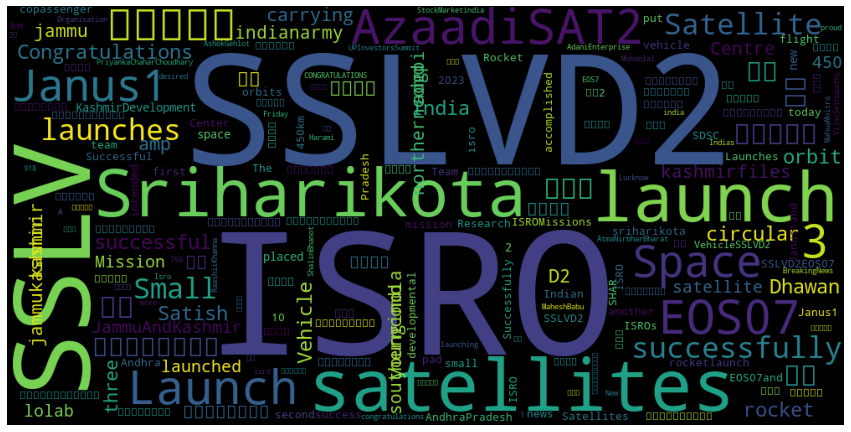

In [8]:
# set parameters
topic_title = 'ISRO_SSLVD2_Launch'
query = 'ISRO (#SSLVD2 OR #ISRO)'
limit = 1000

# scrape tweets and generate wordcloud
rawData = get_tweets(query, limit)
plt = generate_word_cloud(rawData)

## Export Data

In [9]:
# Save Tweets
rawData.to_csv(topic_title + ".csv")
rawData.to_json(topic_title + ".json")
rawData.to_parquet(topic_title + ".parquet")

In [10]:
# Save Word Cloud
plt.savefig(topic_title + ".png", bbox_inches='tight', dpi=300)